

##### FINAL PROJECT SUBMISSION

##### Student name: AUGUSTINE MAGANI

##### Student pace: self paced / part time / full time: FULL TIME

##### Instructor name: FAITH ROTICH





# **FILM PRODUCTION ANALYSIS**


## Introduction

Data-driven decision-making has become crucial to ensuring successful investments, targeted marketing, and sustained growth in the film production industry.

This analysis focuses on evaluating and comparing the performance of films listed on several key platforms i.e; Box Office Mojo, The Numbers, and The Movie Database (TMDb).


## Step 1 : BUSINESS UNDERSTANDING

A production company must understand what factors contribute to a movie’s success commercially before investing in new films. This entails revenue and also how movies perform across audience platforms.

### Business Questions

- Which movie language performs best among different platforms

- What trends exist across genres, release periods, and production budgets in relation to success?

- What is the ideal runtime minutes for a movie?

- Can early popularity forecast long-term success?


### Objectives

- Identifying the top ranking movie genres over time

- Examining trends in average gross revenue of films over time.

- Determining the release months with the highest audience engagement

- Examining movie production budget over the years

- Identifying ROI trends over the years

- Ranking the top 10 highest-grossing film studios

- Determining the most popular movie languages



## Step 2 : DATA UNDERSTANDING

For this analysis, I used 3 datasets.

#### _Box Office Mojo_

Providing revenue statistics for movies published in the Website.

#### _The Movie Database(TMDb)_

Also provides useful elements for movies published in the Movie database

#### _The Numbers_

Provides revenue data from The numbers dataset

## Step 3 : DATA PREPARATION

#### Loading and previewing the datasets

In [2]:
#Importing all the necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from numbers import Number
import sqlite3
from scipy import stats
%matplotlib inline
import os
import zipfile

### 1. Box Office Mojo dataset

In [7]:
bom_df = pd.read_csv("bom.movie_gross.csv.gz")

#### _Reading the first 5 rows_

In [8]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### *Viewing the last rows of the df*

In [9]:
bom_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


Identifying the number of rows and columns 

In [34]:
bom_df.shape

(3387, 5)

_The box office dataframe has 3,387 rows and 5 columns_

In [33]:
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


**title** _contains the title of the movies_

**studio column** _has abbreviated names of the studios producing the respective movie_

**domestic_gross column** _shows the amount of revenue generated by the movie through sales, locally_

**foreign_gross** _shows the amount of revenue generated by the movie internationally_

**year** _shows the year when the movie was premiered_


#### *Showing a summary of the df*

In [32]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [31]:
#range of the rows of the df
bom_df.index

RangeIndex(start=0, stop=3387, step=1)

In [37]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

#### _Detecting NaN Values_

In [39]:
#All cells containing NaN are converted to True, and all cells containing valid data are converted to False
bom_df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


#### _Number of NaN values in the dataset by columns_

In [40]:
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

#### _Filling NaN with no values_

In [41]:
bom_df.fillna('')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,,2018
3383,Edward II (2018 re-release),FM,4800.0,,2018
3384,El Pacto,Sony,2500.0,,2018
3385,The Swan,Synergetic,2400.0,,2018


### 2. The Movie Database

Loading the tm dataset

In [3]:
tmdb_df = pd.read_csv("tmdb.movies.csv.gz")

In [4]:
#Viewing the first five rows
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [36]:
#Checking the last five rows
tmdb_df.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [37]:
#Identifying the number of rows ad columns
tmdb_df.shape

(26517, 10)

The movie database has 26,517 rows and 10 columns

In [38]:
#Showing the columns 
tmdb_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [39]:
#Showing a summary of the tmdb df
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [ ]:
Detecting the NaN values

Number of NaN values in the dataset by columns

In [40]:
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Now it is evident there are no NaN values in the movies database thus the data is clean.

Checking for missing/null values in the dataset

In [41]:
tmdb_df.isnull()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False,False


Counting missing values per column

In [42]:
tmdb_df.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

As you can see,this dataset has not a single missing value and is intact

### 3. The Numbers Dataset

In [17]:
#Loading the dataset
tn_budget = pd.read_csv("tn.movie_budgets.csv.gz")


In [18]:
#Viewing the first five rows
tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
#Viewing the last five rows
tn_budget.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


## Step 4 : DATA CLEANING

### 1. Box Office Mojo

##### *Detecting NaN values*

In [93]:
bom_df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


*All cells containing NaN are converted to True, and all cells containing valid data are converted to False*


In [92]:
#Counting missing values per column

round((bom_df.isnull().sum()/ len(bom_df))*100,2)

title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64

*foreign_gross holds the highest number of missing values, with 39.86% of its data missing. This can be calculated using other columns like domestic_gross and creating another column called total_gross then computing using the mean of the total gross column.*

In [94]:
# Convert the two numeric number columns from strings to float datatypes

bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')

# Calculate another column Total_gross for total gross generated both locally and internationaly

bom_df['Total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [96]:
# Use the mean total gross to fill missing values for foreign gross

mean_total = bom_df['Total_gross'].mean()
bom_df.loc[bom_df['foreign_gross'].isna(), 'foreign_gross'] = (
    mean_total - bom_df.loc[bom_df['foreign_gross'].isna(), 'domestic_gross']
)

In [110]:
#Count for the remaining missing values
round((bom_df.isnull().sum()/ len(bom_df))*100,2)

title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
Total_gross       0.0
dtype: float64

*The remaining data has a few missing values that can be dropped  now without having a significant effect on our data*

In [99]:
bom_df= bom_df.dropna()

In [100]:
#Checking the last rows to see if the remaining missing values are all dropped
bom_df.tail()

,title,studio,domestic_gross,foreign_gross,year,Total_gross
3275,I Still See You,LGF,1400.0,1500000.0,2018,1501400.0
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,954000.0
3309,Time Freak,Grindstone,10000.0,256000.0,2018,266000.0
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,98400.0
3353,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,73200.0


### 2. The Movies Database (TMDb)

*Checking any null values in the dataset*

In [5]:
round((tmdb_df.isnull().sum()/ len(tmdb_df))*100,2)

Unnamed: 0           0.0
genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

*There are no null values in the dataset above and everything is as it should be.*

### 3. The Numbers Dataset

In [20]:

round((tn_budget.isnull().sum()/ len(tn_budget))*100,2)

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

*This dataset has no missing values but we need to check for info and find out if the datasets are in the correct format*

In [113]:
tn_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


*Some of these columns need to be floats but they are object type.*

In [21]:
#Convert the date column into a pandas-recognizable datetime format

tn_budget['release_date'] = pd.to_datetime(tn_budget['release_date'])

In [22]:
columns = ['domestic_gross', 'production_budget', 'worldwide_gross']

# Remove $ and commas, then convert to float

for col in columns:
    tn_budget[col] = tn_budget[col].replace(r'[\$,]', '', regex=True).astype(float)

In [116]:
#Checking if the corrections are in place
tn_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


*From here we then move to data analysis*



## Step 5 : DATA ANALYSIS

### 1. Box Office Mojo

_Calculating the trends of both foreign and domestic gross over the years_

In [117]:
#Using the Box Office Mojo dataset
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [118]:
#Grouping the data
gross_by_year = bom_df.groupby('year')[['domestic_gross', 'foreign_gross', 'Total_gross']].mean().reset_index()

_Visualizing comparison between the domestic gross and foreign gross_

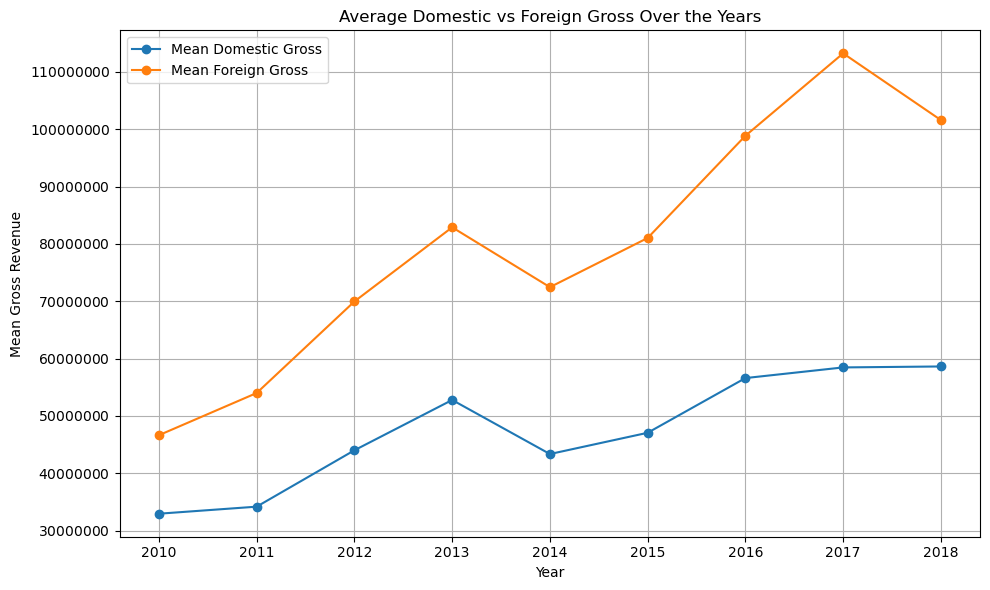

In [119]:
#Create plots.
#Use ticker to ensure visualizations are well labelled

import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))
plt.plot(gross_by_year['year'], gross_by_year['domestic_gross'], label='Mean Domestic Gross', marker='o')
plt.plot(gross_by_year['year'], gross_by_year['foreign_gross'], label='Mean Foreign Gross', marker='o')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')  # Ensures full number display
plt.xlabel('Year')
plt.ylabel('Mean Gross Revenue')
plt.title('Average Domestic vs Foreign Gross Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [120]:
gross_by_year.value_counts()

year  domestic_gross  foreign_gross  Total_gross 
2010  3.296345e+07    4.665380e+07   7.961725e+07    1
2011  3.419203e+07    5.400989e+07   8.820192e+07    1
2012  4.402413e+07    6.997113e+07   1.139953e+08    1
2013  5.279425e+07    8.290121e+07   1.356955e+08    1
2014  4.336745e+07    7.246439e+07   1.158318e+08    1
2015  4.707417e+07    8.103932e+07   1.281135e+08    1
2016  5.661299e+07    9.886140e+07   1.554744e+08    1
2017  5.847027e+07    1.132326e+08   1.717028e+08    1
2018  5.863697e+07    1.015959e+08   1.602328e+08    1
dtype: int64

_There is a visible increase in the mean foreign gross from 498,986,300 in 2010 to 1,071,536,000 in 2018._

###### Now visualize The total gross of both domestic and foreign gross

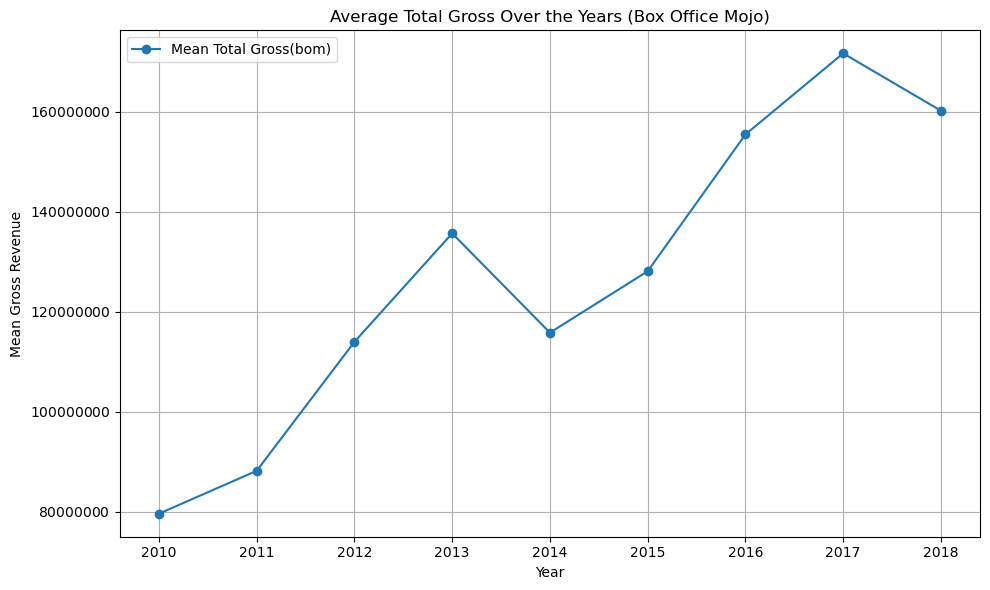

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(gross_by_year['year'], gross_by_year['Total_gross'], label='Mean Total Gross(bom)', marker='o')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')  # Ensures full number display
plt.xlabel('Year')
plt.ylabel('Mean Gross Revenue')
plt.title('Average Total Gross Over the Years (Box Office Mojo)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


_Increase in gross is more visible in the total gross, increasing from 814,415,800 in 2010 to 1,431,640,000 in 2018._

##### Determining the highest grossing studios

In [135]:
bom_df['studio'].value_counts()

Uni.            141
Fox             134
WB              130
Sony            105
BV              102
               ... 
AGF               1
Icar.             1
MPFT              1
KC                1
Darin Southa      1
Name: studio, Length: 172, dtype: int64

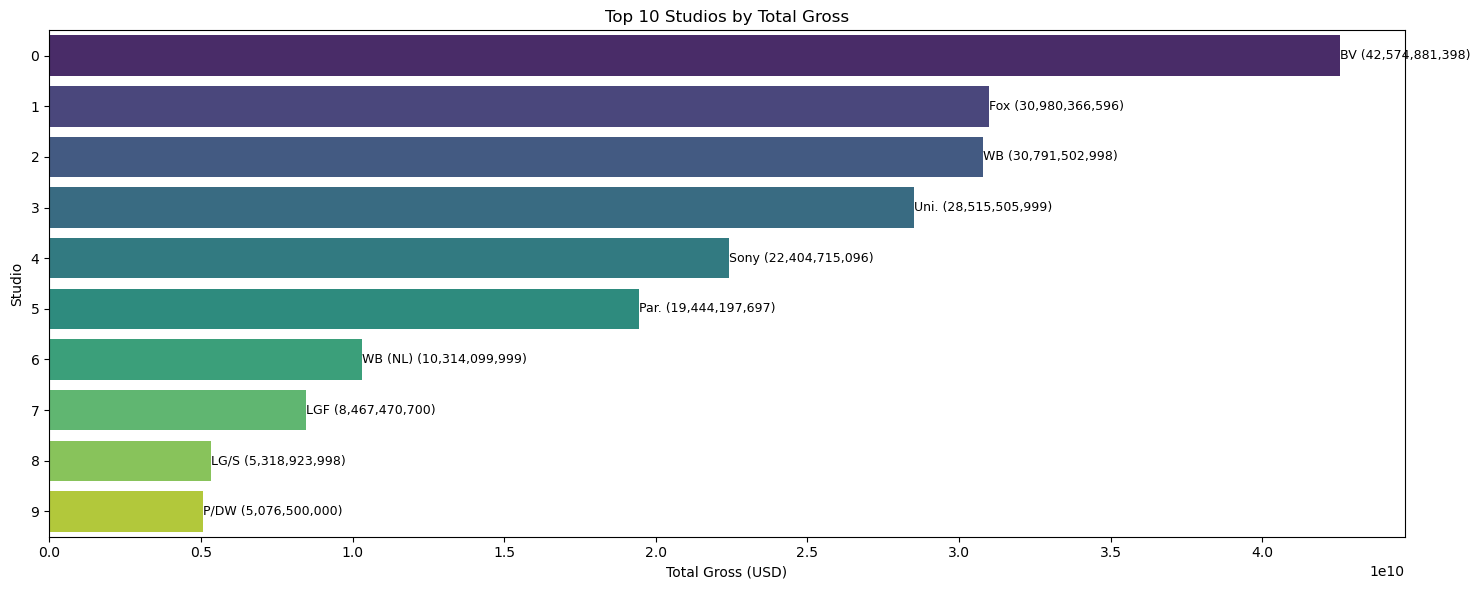

In [137]:
#Grouping the data first, by studio and calculate the total gross per category

studio_gross = bom_df.groupby('studio')['Total_gross'].sum().sort_values(ascending=False).head(10)

#Plot the visualization
plt.figure(figsize=(15,6))
sns.barplot(x=studio_gross.values, y=studio_gross.index, palette='viridis', )
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y') 

# Ensure that it displays the names

for i, (value, name) in enumerate(zip(studio_gross.values, studio_gross.index)):
    plt.text(value + 1e6, i, f'{name} ({value:,.0f})', va='center', fontsize=9)

plt.title("Top 10 Studios by Total Gross")
plt.xlabel("Total Gross (USD)")
plt.ylabel("Studio")
plt.tight_layout()
plt.show()


_The top ten most grossing studios are BV down to P/DW with their respective total gross alongside each._



### 2. The Numbers Dataset

#### _The numbers production budget over the years_

In [123]:
# Retrieving the year from the date time

tn_budget['year'] = tn_budget['release_date'].dt.year

# Group by year
avg_budget_by_year = tn_budget.groupby('year', as_index=False)['production_budget'].mean()

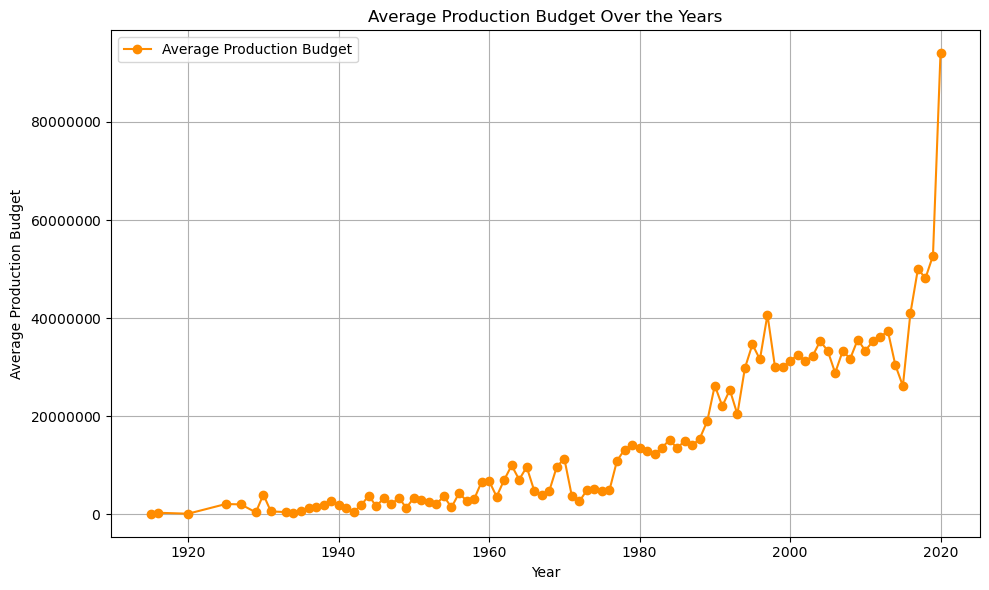

In [126]:
# Plotting the production budget 

plt.figure(figsize=(10, 6))
plt.plot(avg_budget_by_year['year'], avg_budget_by_year['production_budget'], label='Average Production Budget', marker='o', color='darkorange')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y') 
plt.xlabel('Year')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

_We can see an increase from 1,100,000 in 1915 to 940,000,000 in 2020,
thus indicating that the budget increased gradually over time._ 

In [127]:
avg_budget_by_year .value_counts()

year  production_budget
1915  1.100000e+05         1
1916  2.929535e+05         1
1995  3.463400e+07         1
1994  2.978620e+07         1
1993  2.037973e+07         1
                          ..
1954  3.636667e+06         1
1953  2.128000e+06         1
1952  2.423333e+06         1
1951  2.958333e+06         1
2020  9.400000e+07         1
Length: 96, dtype: int64

 #### _Identifying trends of ROI over the years_

In [128]:
tn_budget['domestic_roi'] = (tn_budget['domestic_gross'] - tn_budget['production_budget']) / tn_budget['production_budget']
tn_budget['worldwide_roi'] = (tn_budget['worldwide_gross'] - tn_budget['production_budget']) / tn_budget['production_budget']

In [129]:
tn_budget['year'] = tn_budget['release_date'].dt.year
roi_by_year = tn_budget.groupby('year', as_index=False)[['domestic_roi', 'worldwide_roi']].mean()

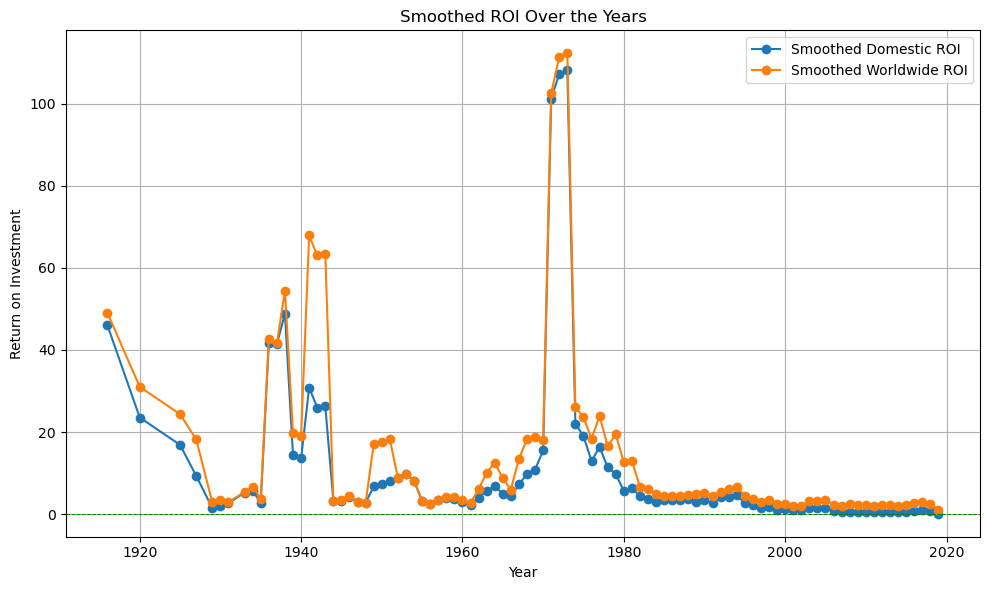

In [134]:
roi_by_year['domestic_roi_smooth'] = roi_by_year['domestic_roi'].rolling(window=3, center=True).mean()
roi_by_year['worldwide_roi_smooth'] = roi_by_year['worldwide_roi'].rolling(window=3, center=True).mean()

# Plotting smoothed curves
plt.figure(figsize=(10, 6))
plt.plot(roi_by_year['year'], roi_by_year['domestic_roi_smooth'], label='Smoothed Domestic ROI', marker='o')
plt.plot(roi_by_year['year'], roi_by_year['worldwide_roi_smooth'], label='Smoothed Worldwide ROI', marker='o')
plt.axhline(0, color='green', linestyle='--', linewidth=0.7)
plt.xlabel('Year')
plt.ylabel('Return on Investment')
plt.title('Smoothed ROI Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

_The curve is very unpredictable in both the domestic and worldwide ROI. In the 15s to 70s (years), the ROI was high reaching over 50%, however in the recent years this has gone down to less than 10% annualy._

### 3. The Movies Database (TMDB)

#### _Movie language and popularity_

In [6]:
tmdb_df['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: original_language, Length: 76, dtype: int64

_At the top is the English movie with 23,291._

##### _Top Ten Languages and there popularity_

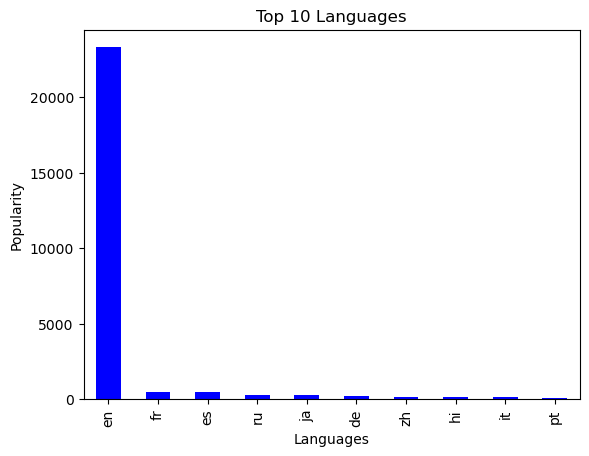

In [23]:
#Retrieving the first ten languages

tmdb_df['original_language'].value_counts().head(10)

# Plotting a hist of the top 10 languages used

tmdb_df['original_language'].value_counts().head(10).plot(kind = 'bar',  color = 'blue' )
plt.title('Top 10 Languages')
plt.xlabel('Languages')
plt.ylabel('Popularity')
plt.show()

 *The eng/english language leads on the top 10 languages used in movie production and is also the most popular language*


## Step 6 : RECOMMENDATIONS


1. Partnering with High-Grossing Studios such as Sony Pictures, Warner Bros, and 20th Century Fox have shown immense-grossing films and Collaborating or buying their ideas  of production and distribution strategies could enhance commercial outcomes.

2. Targeting International Markets; International releases show greater predictability and performance thus expanding production efforts to cater to global audiences can enhance market penetration and revenue stability. 


3. Maximizing Production Budgets Strategically; Investing in quality production, casting, and marketing is essential to securing long-term financial returns.

4. Investing in High-Demand Language Markets;  Strategic investment in languages such as English, French, Spanish, and Russian that consistently demonstrate higher popularity and commercial success is advised to capture broader audience bases.